In [455]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [480]:
#load dataset
os.chdir("E:\Data")
data = pd.read_csv("day.csv")

In [457]:
os.getcwd()

'E:\\Data'

In [458]:
data.shape

(731, 16)

In [505]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt
0,1,0,1,False,6,False,2,0.344167,0.160446,985
1,1,0,1,False,0,False,2,0.363478,0.248539,801
2,1,0,1,False,1,True,1,0.196364,0.248309,1349
3,1,0,1,False,2,True,1,0.200000,0.160296,1562
4,1,0,1,False,3,True,1,0.226957,0.186900,1600


In [6]:
data.shape

(731, 16)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [460]:
#check for missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [461]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [481]:
#changing to appropriate datatypes
data['season']=data['season'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['holiday']=data['holiday'].astype('bool')
data['weekday']=data['weekday'].astype('category')
data['workingday']=data['workingday'].astype('bool')
data['weathersit']=data['weathersit'].astype('category')















In [445]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,cnt
0,1,0,1,False,6,False,2,0.344167,0.160446,985
1,1,0,1,False,0,False,2,0.363478,0.248539,801
2,1,0,1,False,1,True,1,0.196364,0.248309,1349
3,1,0,1,False,2,True,1,0.200000,0.160296,1562
4,1,0,1,False,3,True,1,0.226957,0.186900,1600


In [482]:
data.dtypes


instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday           bool
weekday       category
workingday        bool
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [486]:
#storing continous independent variables in a list 
cnames=['temp','atemp','hum','windspeed']

#storing continous variables in a list
cdnames=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [500]:
data.describe()

,yr,temp,windspeed,registered,cnt
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,0.499303,0.497365,0.186287,3675.899582,4532.843794
std,0.500349,0.183617,0.071786,1557.676255,1933.542429
min,0.000000,0.059130,0.022392,20.000000,22.000000
25%,0.000000,0.337500,0.134329,2545.000000,3214.000000
50%,0.000000,0.505833,0.178496,3681.000000,4570.000000
75%,1.000000,0.656667,0.230721,4807.000000,6031.000000
max,1.000000,0.861667,0.378108,6946.000000,8714.000000


# Correlation Analysis

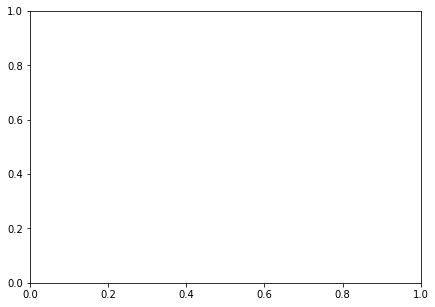

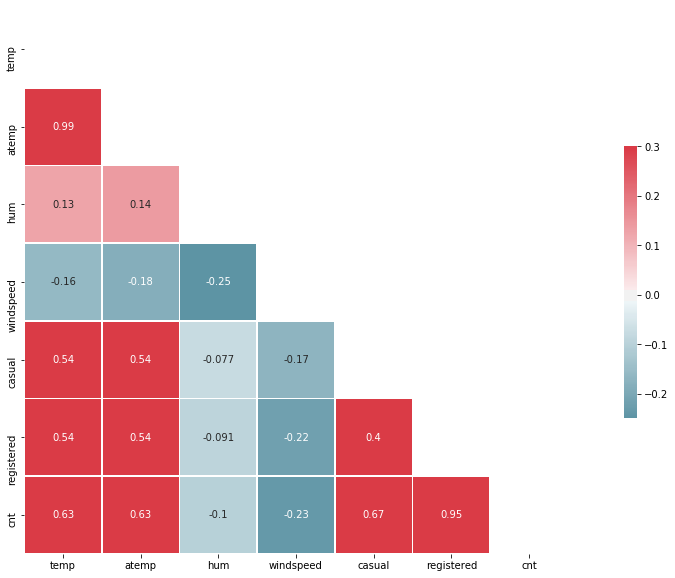

In [488]:

#generate a dataframe of continous variables
data_corr=data.loc[:,cdnames]

#set the height and width of the plot
h,w=plt.subplots(figsize=(7,5))

#generate correlation matrix
corr=data_corr.corr()

#plot heat map
#sns.heatmap(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig = plt.subplots(figsize=(20,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)





In [454]:
data.dtypes

season        category
yr               int64
mnth          category
holiday           bool
weekday       category
workingday        bool
weathersit    category
temp           float64
windspeed      float64
cnt              int64
dtype: object

# Outlier analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x20784cceba8>,
 'caps': [<matplotlib.lines.Line2D at 0x20784cce2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20784cce588>],
 'medians': [<matplotlib.lines.Line2D at 0x20784cc4d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x20784a8f278>],
 'means': []}

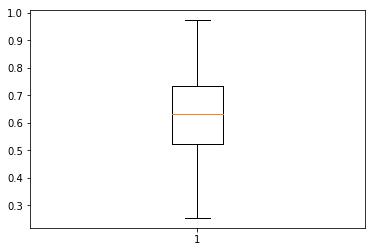

In [491]:
#Plotting Boxplot for outlier analysis
%matplotlib inline

plt.boxplot(data['hum'])


In [490]:
#Removing Outliers
for i in cnames:
    q25,q75=np.percentile(data.loc[:,i],[25,75])
    iqr=q75-q25
    max=q75+(iqr*1.5)
    min=q25-(iqr*1.5)
    
    data=data.drop(data[data.loc[:,i]>max].index)
    data=data.drop(data[data.loc[:,i]<min].index)
    

In [504]:
#dropping non important features
data = data.drop(['atemp','instant','dteday','hum','casual','registered'],axis=1)

In [493]:
#storing categorical variable names
cat_names=['season','yr','mnth','holiday','weekday','workingday','weathersit']

# Linear Regression

In [ ]:
#importing Linear Regression Libraries
from sklearn.linear_model import LinearRegression


In [ ]:
from sklearn.cross_validation import train_test_split

In [506]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)


In [ ]:
#MAPE function(for Model Evaluation)
def MAPE(y_true,y_pred):
    MAPE = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return MAPE

In [509]:
#Training a Linear Regression Model
LR_model = LinearRegression().fit(x_train,y_train)

In [514]:
#Returns the coefficient of determination R^2 of the prediction.
LR_model.score(x_train,y_train)

0.8197359014589176

In [519]:
#predicting the test set from linear Regression
LR_pred = LR_model.predict(x_test)

In [518]:
#Coefficients of Linear Regression Model
print('Coefficients: \n', LR_model.coef_)

Coefficients: 
 [ 4.39867043e+02  1.58649796e+03 -1.72790184e+01 -7.65450817e+01
  2.55964394e+01  1.48779593e+03 -5.36011015e+02  1.92554774e+03
  5.94449127e-01]


In [521]:
#MAPE of Linear Regression: 15.89%
#Accuracy:84.11%
#R^2:81.9%
MAPE(y_test,LR_pred)


15.898605445019061

# Decision Tree Regressor

In [522]:
#importing Decision Tree Libraries
from sklearn.tree import DecisionTreeRegressor

In [523]:
#Training the Decision Tree Model
DTR_model = DecisionTreeRegressor().fit(x_train,y_train)

In [526]:
DTR_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [543]:
!pip install pydotplus

  Running setup.py bdist_wheel for pydotplus: started
  Running setup.py bdist_wheel for pydotplus: finished with status 'done'
  Stored in directory: C:\Users\Aditya\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [525]:
#Predicting Test set from Decsion Tree
DTR_pred = DTR_model.predict(x_test)

In [528]:
#MAPE:16.01%
#R^2:0.98
#Perfectly fits the data
MAPE(y_test,DTR_pred)     

16.01501107962133

In [532]:
#R^2
DTR_model.score(x_train,y_train)

1.0

# Random Forest Regressor

In [320]:
#importing Random Forest Libraries
from sklearn.ensemble import RandomForestRegressor

In [533]:
RF_model = RandomForestRegressor().fit(x_train,y_train)

In [535]:
RF_pred = RF_model.predict(x_test)

In [537]:
#MAPE:12.56%
#R^2:0.97
MAPE(y_test,RF_pred)
RF_model.score(x_train,y_train)

0.9762874725180338